# API initialization

The authentification keys are stored as environment variables.

To save authentification keys, do the following in the command prompt (for MacOS):

$touch ~/.bash_profile

Then :

$open -a TextEdit.app ~/.bash_profile

add the following in the opened file (for each variable):

export VARIABLE_NAME=VARIABLE_VALUE

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pprint
import twitter
import os

CONSUMER_KEY = os.environ["CONSUMER_KEY"]
CONSUMER_SECRET = os.environ["CONSUMER_SECRET"]
OAUTH_TOKEN = os.environ["OAUTH_TOKEN"]
OAUTH_TOKEN_SECRET = os.environ["OAUTH_TOKEN_SECRET"]
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)

# Trending tweets

In [4]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
FR_WOE_ID = 23424819
US_WOE_ID = 23424977

# To get the rate limits for a given type of request :
# https://dev.twitter.com/rest/public/rate-limits

# Trend request
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
FR_trends = twitter_api.trends.place(_id=FR_WOE_ID)
#FR_trends
#world_trends[0]['trends'] // dictionnary with the different informations for the world trends

# Common trends

In [5]:
world_trends_set = set([trend['name']
for trend in world_trends[0]['trends']])
FR_trends_set = set([trend['name']
for trend in FR_trends[0]['trends']])
common_trends = world_trends_set.intersection(FR_trends_set)
common_trends

{'#HOLUPitsBOBBYDay', '#JusticeLeague', 'Alex Morgan', 'Petra Kvitova'}

# Fetch tweets

In [18]:
import json
q = 'Angela Merkel'
count = 30

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets 
search_results = twitter_api.search.tweets(q=q, count=count) 
statuses = search_results['statuses']
statuses

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Dec 20 16:33:46 +0000 2016',
  'entities': {'hashtags': [{'indices': [29, 36], 'text': 'Berlin'},
    {'indices': [65, 78], 'text': 'AngelaMerkel'},
    {'indices': [106, 121], 'text': 'reseauxsociaux'}],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 3028247758,
     'id_str': '3028247758',
     'indices': [3, 16],
     'name': 'RT France',
     'screen_name': 'RTenfrancais'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 811248237390639104,
  'id_str': '811248237390639104',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'fr',
  'metadata': {'iso_language_code': 'fr', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 3,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates': None,


In [7]:
# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist 
        break
    #print()
    #print("next_results:",next_results)   
    # Create a dictionary from next_results, which has the following form: # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
#print(statuses)
    
# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 4
Length of statuses 8
Length of statuses 8
{
 "id_str": "811247430465363970",
 "in_reply_to_user_id_str": null,
 "user": {
  "statuses_count": 3000,
  "is_translation_enabled": false,
  "id_str": "797863311438028801",
  "profile_text_color": "000000",
  "profile_background_color": "000000",
  "is_translator": false,
  "has_extended_profile": false,
  "name": "Lisa lynn",
  "time_zone": "Pacific Time (US & Canada)",
  "translator_type": "none",
  "profile_background_tile": false,
  "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png",
  "default_profile_image": false,
  "profile_sidebar_fill_color": "000000",
  "profile_banner_url": "https://pbs.twimg.com/profile_banners/797863311438028801/1481512854",
  "notifications": false,
  "following": false,
  "protected": false,
  "followers_count": 94,
  "default_profile": false,
  "profile_image_url": "http://pbs.twimg.com/profile_images/808148158031114240/UjerJPjw_normal.jpg",
  "id": 7978633

In [27]:
import json
statuses = json.loads(open('MentionSomeoneImportantForYou.json').read())

# The result of the list comprehension is a list with only one element that
# can be accessed by its index and set to the variable t
t = [ status 
      for status in statuses
          if status['id'] == 316948241264549888 ][0]

# Explore the variable t to get familiarized with the data structure...
#print(t)


### information concerning retweet
#t['retweeted']
# does the tweet is the original one or a retweeted one ???
print (t['retweet_count'])
#print (t['retweeted_status'])
## the retweeted status is important because sometimes tweets are modified when they are retweeted when users add 
## reactions or manipulate the text

#### Number of times a tweet has been bookmarked
print(t['favorite_count'])



### content of a tweet
print(t['text'])


### The entities in the text of a tweet VERY IMPORTANT if we want to do NLP on the information
t['entities']

23
0
RT @hassanmusician: #MentionSomeoneImportantForYou God.


{'hashtags': [{'indices': [20, 50], 'text': 'MentionSomeoneImportantForYou'}],
 'urls': [],
 'user_mentions': [{'id': 56259379,
   'id_str': '56259379',
   'indices': [3, 18],
   'name': 'Download the NEW LP!',
   'screen_name': 'hassanmusician'}]}

In [10]:
###Objectif à réaliser: problème je veux me ramener à la structure de t comme tweet, 
##est-ce que je vais y arriver à partir de FR_trend?
#Recherche du tweet le plus retweeter parmi les trending topics France
#FR_trends

# Extracting different elements from a list of tweets

In [28]:
##### if you execute the previous cell statuses will concern MentionSoemoneImportantForYou
### otherwise it will concern the research on Angela Merkel


#for status in statuses:
    #print(status)
    #print()
    #print("--------------------")


status_texts = [ status['text'] for status in statuses ]
#print(status_texts)
print()
#print(status['entities']['user_mentions'])

############# different entities of a list of tweeet ###########
for status in statuses:
    print("Examination of a new status...")
    for user_mention in status['entities']['user_mentions']:
        print("#####")
        print(user_mention)
        print("-----")
        print(user_mention["screen_name"])

screen_names = [ user_mention['screen_name'] for status in statuses for user_mention in status['entities']['user_mentions'] ]
print("+++++++++")
print("+++++++++")
print("screen_names",screen_names)

################ different hashtag of a list of tweet
for status in statuses:
    print("Examination of a status...")
    print(status['entities']['hashtags'])
    print("--")
    print("End of the current status")

    
hashtags = [ hashtag['text'] for status in statuses for hashtag in status['entities']['hashtags'] ]
print("hashtags=",hashtags)

###### problem avec cette partie 
# Compute a collection of all words from all tweets

words = [ w for t in status_texts for w in t.split() ]
print(words)

# Explore the first 5 items for each...
print("For the five first items")
print (json.dumps(status_texts[0:5], indent=1))
#print json.dumps(screen_names[0:5], indent=1)
#print json.dumps(hashtags[0:5], indent=1)
print (json.dumps(words[0:5], indent=1))


Examination of a new status...
#####
{'indices': [1, 17], 'name': 'can you not? ', 'id': 335803883, 'id_str': '335803883', 'screen_name': 'KathleenMariee_'}
-----
KathleenMariee_
#####
{'indices': [50, 65], 'name': 'alejandro cruz', 'id': 445699886, 'id_str': '445699886', 'screen_name': 'AhhlicksCruise'}
-----
AhhlicksCruise
#####
{'indices': [68, 82], 'name': '#BirdGang. ~(^.^~)', 'id': 337517759, 'id_str': '337517759', 'screen_name': 'itsravennn_cx'}
-----
itsravennn_cx
#####
{'indices': [84, 99], 'name': '♫ Kelanie Nicole★', 'id': 770810791, 'id_str': '770810791', 'screen_name': 'kandykisses_13'}
-----
kandykisses_13
#####
{'indices': [102, 110], 'name': 'Charlemagne Demamp', 'id': 632452596, 'id_str': '632452596', 'screen_name': 'BMOLOGY'}
-----
BMOLOGY
Examination of a new status...
#####
{'indices': [37, 52], 'name': 'Soldier Roxy ', 'id': 582670707, 'id_str': '582670707', 'screen_name': 'Linkin_Sunrise'}
-----
Linkin_Sunrise
Examination of a new status...
#####
{'indices': [3, 

# Analyzing Tweets and Tweet Entities with Frequency Analysis

In [29]:
from collections import Counter
for item in [words,screen_names,hashtags]:
    c=Counter(item)
    print (c.most_common()[:10])

[('#MentionSomeoneImportantForYou', 92), ('RT', 34), ('my', 10), ('@justinbieber', 6), (',', 6), ('&lt;3', 6), ('My', 5), ('I', 4), ('and', 4), ('love', 3)]
[('justinbieber', 6), ('Kid_Charliej', 2), ('Cavillafuerte', 2), ('VasHappeninThea', 1), ('azry_angah', 1), ('touchmestyles_', 1), ('heyitsadila', 1), ('_zizo96', 1), ('Janoskians2k12_', 1), ('FrancesGonzale', 1)]
[('MentionSomeoneImportantForYou', 94), ('mentionsomeoneimportantforyou', 3), ('Love', 1), ('NoHomo', 1), ('bebesito', 1), ('MentionSomeOneImportantForYou', 1), ('MyHeart', 1)]


In [30]:
from prettytable import PrettyTable
for label, data in (('Word', words),('Screen Name', screen_names),('Hashtag', hashtags)):
    pt=PrettyTable(field_names=[label, 'Count'])
    c=Counter(data)
    [pt.add_row(kv) for kv in c.most_common()[:10] ]
#pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

+--------------------------------+-------+
|              Word              | Count |
+--------------------------------+-------+
| #MentionSomeoneImportantForYou |   92  |
|               RT               |   34  |
|               my               |   10  |
|         @justinbieber          |   6   |
|               ,                |   6   |
|             &lt;3              |   6   |
|               My               |   5   |
|               I                |   4   |
|              and               |   4   |
|              love              |   3   |
+--------------------------------+-------+
+-----------------+-------+
|   Screen Name   | Count |
+-----------------+-------+
|   justinbieber  |   6   |
|   Kid_Charliej  |   2   |
|  Cavillafuerte  |   2   |
| VasHappeninThea |   1   |
|    azry_angah   |   1   |
|  touchmestyles_ |   1   |
|   heyitsadila   |   1   |
|     _zizo96     |   1   |
| Janoskians2k12_ |   1   |
|  FrancesGonzale |   1   |
+-----------------+-------+
+-----

# Lexical diversity of tweets

In [31]:
##### This function will exactly compute a TF-IDF 
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return (1.0*len(set(tokens))/len(tokens))

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses)

print (lexical_diversity(words))
print (lexical_diversity(screen_names))
print (lexical_diversity(hashtags))
print (average_words(status_texts))

0.6761061946902654
0.9554140127388535
0.06862745098039216
5.76530612244898


# Patterns in Retweets

In [46]:
retweets = [(status['retweet_count'],status['retweeted_status']['user']['screen_name'],status['text'])
for status in statuses
# ... so long as the status meets this condition.
    if 'retweeted_status' in status
]

# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print (pt)

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 23    | hassanmusician | RT @hassanmusician: #MentionSomeoneImportantForYou |
|       |                | God.                                               |
| 21    | HSweethearts   | RT @HSweethearts: #MentionSomeoneImportantForYou   |
|       |                | my high school sweetheart ❤💋                       |
| 15    | LosAlejandro_  | RT @LosAlejandro_: ¿Nadie te menciono en           |
|       |                | "#MentionSomeoneImportantForYou"? JAJAJAJAJAJAJAJA |
|       |                | JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA Ven, ...  |
| 9     | SCOTTSUMME     | RT @SCOTTSUMME: #MentionSomeoneImportantForYou My  |
|       |                | Mum. Shes loving, caring, strong, all in one. I    |
|       |                | love her so m

If we want to find every user who has retweeted a status

In [48]:
# Get the original tweet id for a tweet from its retweeted_status node
# and insert it here in place of the sample value that is provided
# from the text of the book
_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print ([r['user']['screen_name'] for r in _retweets])

['jyeee', 'Ceejaynatics', 'ikaayyy_', 'RafaellaaaMae', 'LoveKyana18', 'iiaamcamillee', 'kidamgos', 'shangxshang', 'asdfghjbl', 'Papagars__', 'josellexseraspi']


# Visualising Frequency Data with Histograms

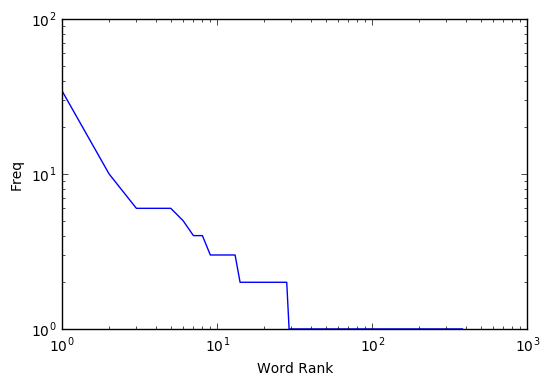

In [57]:
word_counts = sorted(Counter(words).values(), reverse=True)
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

If we are interested in the most retweeted tweet, it could be useful to plot the following graph

[23, 1, 21, 1, 5, 2, 2, 2, 3, 1, 1, 1, 1, 9, 1, 1, 1, 15, 1, 1, 1, 2, 1, 1, 7, 6, 1, 3, 1, 1, 1, 1, 1]


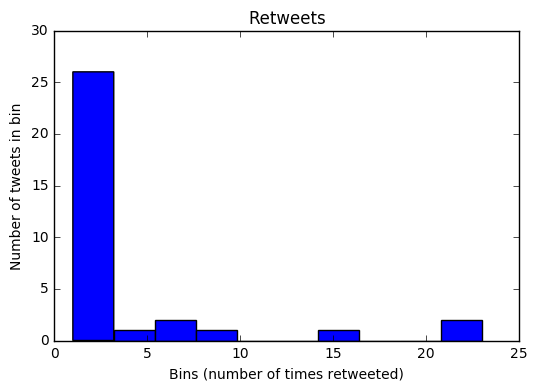

In [66]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them
counts = [count for count, _, _ in retweets]
plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')
print (counts)